<a href="https://colab.research.google.com/github/DommiiUdomp/-/blob/main/Assignment2ModelvalidationIrisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Validation on the Iris dataset

In [1]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline

# If you would like to make further imports from tensorflow, add them here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

In [2]:
def read_in_and_split_data(iris_data):
  return model_selection.train_test_split(iris_data["data"], iris_data["target"], test_size=0.1)

In [3]:
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)
print (train_data.shape)
print (test_data.shape)
print (train_targets.shape)
print (test_targets.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [4]:
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))
print (train_targets.shape)
print (test_targets.shape)

(135, 3)
(15, 3)


In [5]:
def get_model(input_shape):
  model = Sequential()
  model.add (Dense(64, activation = "relu", kernel_initializer='he_uniform', bias_initializer='ones', input_shape=input_shape))
  model.add (Dense(128, activation = "relu"))
  model.add (Dense(128, activation = "relu"))
  model.add (Dense(128, activation = "relu"))
  model.add (Dense(128, activation = "relu"))
  model.add (Dense(64, activation = "relu"))
  model.add (Dense(64, activation = "relu"))
  model.add (Dense(64, activation = "relu"))
  model.add (Dense(64, activation = "relu"))
  model.add (Dense(3, activation = "softmax"))
  return model
model = get_model(train_data[0].shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

In [6]:
train_data[0].shape

(4,)

In [7]:
def compile_model(model):
  opt = Adam(learning_rate=0.0001) 
  acc = tf.keras.metrics.Accuracy() 
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[acc] ) 

compile_model(model)

In [8]:
def train_model(model, train_data, train_targets, epochs):
  return model.fit(train_data, train_targets, batch_size = 40, epochs= epochs, validation_split = 0.15, verbose='auto')

history = train_model(model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 1s 113ms/step - loss: 1.1077 - accuracy: 0.0000e+00 - val_loss: 1.0987 - val_accuracy: 0.0000e+00
Epoch 2/800
3/3 [==============================] - 0s 13ms/step - loss: 1.0457 - accuracy: 0.0000e+00 - val_loss: 1.0378 - val_accuracy: 0.0000e+00
Epoch 3/800
3/3 [==============================] - 0s 15ms/step - loss: 1.0096 - accuracy: 0.0000e+00 - val_loss: 0.9957 - val_accuracy: 0.0000e+00
Epoch 4/800
3/3 [==============================] - 0s 13ms/step - loss: 0.9734 - accuracy: 0.0000e+00 - val_loss: 0.9672 - val_accuracy: 0.0000e+00
Epoch 5/800
3/3 [==============================] - 0s 14ms/step - loss: 0.9406 - accuracy: 0.0000e+00 - val_loss: 0.9345 - val_accuracy: 0.0000e+00
Epoch 6/800
3/3 [==============================] - 0s 13ms/step - loss: 0.9083 - accuracy: 0.0000e+00 - val_loss: 0.9078 - val_accuracy: 0.0000e+00
Epoch 7/800
3/3 [==============================] - 0s 13ms/step - loss: 0.8804 - accuracy: 0.0000e+00 - val_los

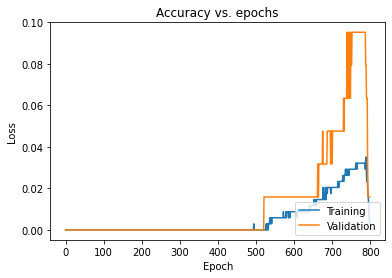

In [9]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [10]:
import pandas as pd
from pandas import DataFrame
frame = pd.DataFrame(history.history)
frame.head()

,loss,accuracy,val_loss,val_accuracy
0,1.107738,0.0,1.098666,0.0
1,1.045723,0.0,1.037836,0.0
2,1.009602,0.0,0.995672,0.0
3,0.973369,0.0,0.967191,0.0
4,0.940622,0.0,0.934507,0.0


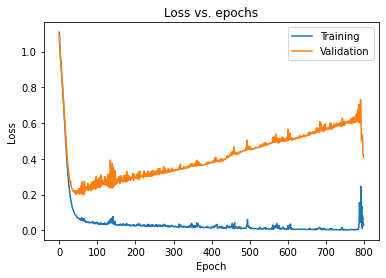

In [11]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [12]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
  regularised_model = Sequential()
  regularised_model.add (Dense(64, activation = "relu", kernel_initializer='he_uniform', bias_initializer='ones',   
                               kernel_regularizer = tf.keras.regularizers.l2(weight_decay), 
                               input_shape=input_shape))
  regularised_model.add (Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = "relu")) #2
  regularised_model.add (Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = "relu")) #3
  regularised_model.add (Dropout(dropout_rate))
  regularised_model.add (Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = "relu")) #4
  regularised_model.add (Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = "relu")) #5
  regularised_model.add (BatchNormalization(momentum=0.95))
  regularised_model.add (Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = "relu")) #6
  regularised_model.add (Dropout(dropout_rate))
  regularised_model.add (Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = "relu")) #7
  regularised_model.add (Dropout(dropout_rate))
  regularised_model.add (Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = "relu")) #8
  regularised_model.add (Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = "relu")) #9
  regularised_model.add (Dropout(dropout_rate))
  regularised_model.add (Dense(3, activation = "softmax")) #10

  return regularised_model


In [13]:
regularised_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)
print(regularised_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)              

In [14]:
compile_model(regularised_model)

In [15]:
reg_history = train_model(regularised_model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 1s 121ms/step - loss: 2.1403 - accuracy: 0.0000e+00 - val_loss: 1.9824 - val_accuracy: 0.0000e+00
Epoch 2/800
3/3 [==============================] - 0s 13ms/step - loss: 2.1502 - accuracy: 0.0000e+00 - val_loss: 1.9486 - val_accuracy: 0.0000e+00
Epoch 3/800
3/3 [==============================] - 0s 16ms/step - loss: 2.1865 - accuracy: 0.0000e+00 - val_loss: 1.9202 - val_accuracy: 0.0000e+00
Epoch 4/800
3/3 [==============================] - 0s 13ms/step - loss: 2.1853 - accuracy: 0.0000e+00 - val_loss: 1.8954 - val_accuracy: 0.0000e+00
Epoch 5/800
3/3 [==============================] - 0s 14ms/step - loss: 2.2053 - accuracy: 0.0000e+00 - val_loss: 1.8775 - val_accuracy: 0.0000e+00
Epoch 6/800
3/3 [==============================] - 0s 14ms/step - loss: 2.0286 - accuracy: 0.0000e+00 - val_loss: 1.8658 - val_accuracy: 0.0000e+00
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 2.1236 - accuracy: 0.0000e+00 - val_los

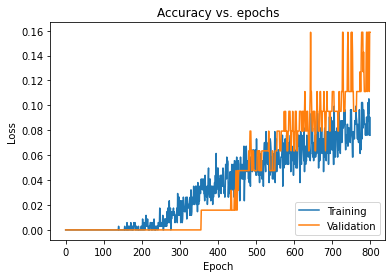

In [16]:
try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [22]:
def get_callbacks():

    early_stopping = tf.keras.callbacks.EarlyStopping(patience=30, monitor='val_loss' , mode='min')
    learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=20)
    
    return (early_stopping, learning_rate_reduction)
    

In [25]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [26]:
learning_rate_reduction.patience

20

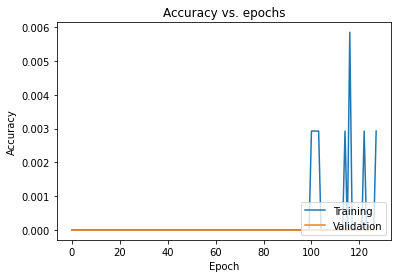

In [27]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

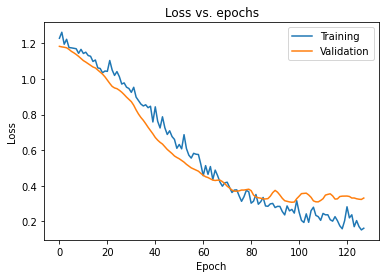

In [28]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 